Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [X] Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [4]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Unpacking objects: 100% (94/94), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.3MB/s 
     |████████████████████████████████| 112kB 8.8MB/s 
     |████████████████████████████████| 133kB 56.7MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
     |████████████████████████████████| 7.1MB 7.2MB/s 
     |████████████████████████████████| 235kB 53.1MB/s 
     |████████████████████████████████| 614kB 42.5MB/s 
     |████████████████████████████████| 225kB 54.4MB/s 
     |████████████████████████████████| 768kB 46.0MB/s 
     |████████████████████████████████| 51kB 24.2MB/s 
     |████████████████████████████████| 194kB 56.9MB/s 
     |███████████████████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [7]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np


In [10]:
df = df[(df['latitude'] >= np.percentile(df['latitude'], 0.1)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.9)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.1)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.9))]
df.shape

(49201, 34)

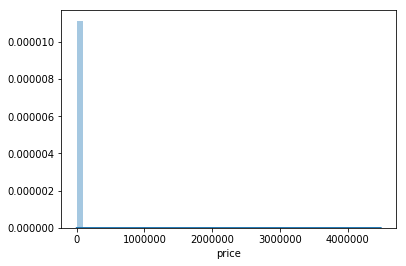

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['price'])

In [12]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49201.000000,49201.000000,49201.000000,49201.000000,4.920100e+04,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000,49201.000000
mean,1.211886,1.541737,40.751064,-73.972545,3.832923e+03,0.525396,0.477104,0.477836,0.446617,0.425825,0.414809,0.366375,0.052540,0.268897,0.185769,0.177354,0.133087,0.138839,0.104226,0.087458,0.060852,0.055507,0.052011,0.046910,0.043576,0.042743,0.039471,0.027601,0.026158
std,0.500215,1.114926,0.038956,0.028905,2.209977e+04,0.499360,0.499481,0.499514,0.497147,0.494472,0.492694,0.481818,0.223115,0.443391,0.388924,0.381972,0.339672,0.345782,0.305556,0.282507,0.239062,0.228970,0.222052,0.211447,0.204153,0.202279,0.194714,0.163829,0.159607
min,0.000000,0.000000,40.576500,-74.036000,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991700,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751800,-73.977900,3.150000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774300,-73.954800,4.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,40.896100,-73.755500,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201,49201
mean,1,2,41,-74,3833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,1,1,0,0,22100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,41,-74,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,1,1,41,-74,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,1,1,41,-74,3150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,1,2,41,-74,4100,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,10,8,41,-74,4490000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
df = df[df.price < 15000]
df.shape

(48881, 34)

In [15]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881,48881
mean,1,2,41,-74,3553,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,0,1,0,0,1707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,41,-74,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,1,1,41,-74,2499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,1,1,41,-74,3150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,1,2,41,-74,4080,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,10,8,41,-74,14999,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
#after cleaning the maen is 3553

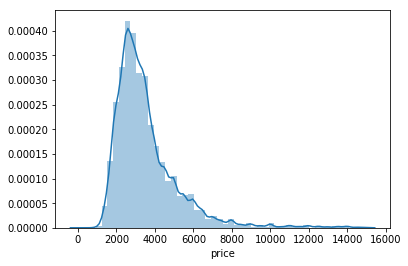

In [16]:
sns.distplot(df['price'])

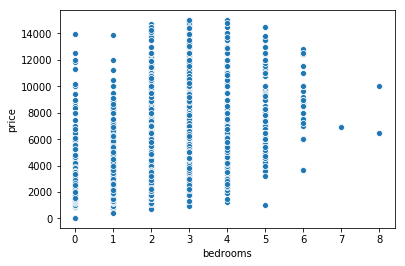

In [17]:
sns.scatterplot(y=df['price'],x=df['bedrooms'])

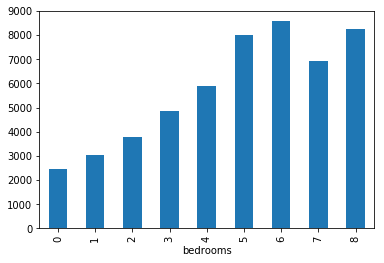

In [20]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

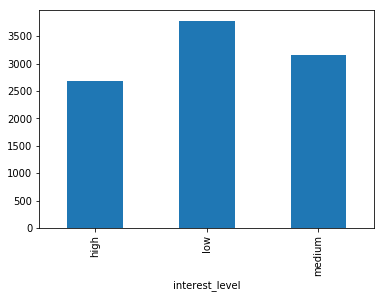

In [21]:
df.groupby('interest_level')['price'].mean().plot(kind='bar')

In [22]:
df['rooms'] = df.bedrooms + df.bathrooms
df.head(2)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


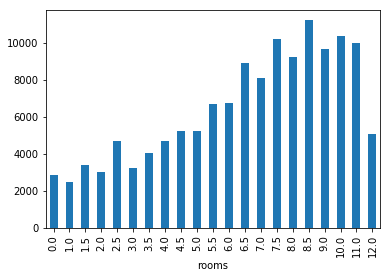

In [23]:
df.groupby('rooms')['price'].mean().plot(kind='bar')

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [26]:
y = df['price']
X = df[['bedrooms']]

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.coef_, model.intercept_

(array([836.54754043]), 2273.4432308856904)

In [30]:
ypred = model.predict(X)

r2_score(y,ypred)

0.29353835765732883

In [0]:
from sklearn.metrics import mean_absolute_error
def make(df,y,x):
  X = df[[x]]
  y = df[y]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train,y_train)
  coef = model.coef_
  intercept = model.intercept_
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2score = r2_score(y_test,y_pred)
  r2score_train = r2_score(y_train, y_pred_train)
  print('Coef = ' +str(coef[0]) + '   intercept = '+str(intercept))
  print('')
  print('R-score for test '+str(r2score))
  print('R-score for train '+str(r2score_train))
  print('')
  print('MAE TEST ' + str(mean_absolute_error(y_test,y_pred)))
  print('MAE TRAIN ' + str(mean_absolute_error(y_train,y_pred_train)))


In [44]:
make(df,'price','bedrooms')

Coef = 839.910023164731   intercept = 2270.5248641802273

R-score for test 0.28523245994662283
R-score for train 0.29762646566413253

MAE TEST 964.583149162168
MAE TRAIN 955.4819844413186


In [38]:
make(df,'price','rooms')

Coef = 794.3025018671163   intercept = 1388.2444924694596

R-score for test 0.41263274631978986
R-score for train 0.4303680269628015

MAE TEST 889.9084040013954
MAE TRAIN 880.2637492978328


In [0]:
features = ['rooms','bathrooms']
make(df,'price',features)